<a href="https://colab.research.google.com/github/eashwarydubey/machine-learning/blob/main/Allstate_Claim_Loss_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/dataset/allstate
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

test.csv  train.csv


In [ ]:
!pip install yellowbrick

# Objective

The purpose of this project is to create machine learning models that could accurately predict the severity of auto claims from independent numerical and categorical variables. The [dataset](https://www.kaggle.com/c/allstate-claims-severity/data) is provided by Allstate Insurance, a P&C insurance company that is specialized in auto insurance in North America.  

## Description of Data :

- "id": Unique identifier of an insurance claim lodged
- "cat1" to "cat116": Categorical variables (masked)
- "cont1" to "cont14": Continuous variables (masked)
- "loss": The amount of claim the company has to pay out. This is the - target variable present in training data.

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return False;
}

/* scroll bar in output */

<IPython.core.display.Javascript object>

In [ ]:
train_csv=pd.read_csv("/content/drive/MyDrive/dataset/allstate/train.csv")


In [ ]:
test_csv=pd.read_csv("/content/drive/MyDrive/dataset/allstate/test.csv")


In [ ]:
train_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [ ]:
train_csv.head(5)

id cat1 cat2 cat3 cat4  ...    cont11    cont12    cont13    cont14     loss
0   1    A    B    A    B  ...  0.569745  0.594646  0.822493  0.714843  2213.18
1   2    A    B    A    A  ...  0.338312  0.366307  0.611431  0.304496  1283.60
2   5    A    B    A    A  ...  0.381398  0.373424  0.195709  0.774425  3005.09
3  10    B    B    A    B  ...  0.327915  0.321570  0.605077  0.602642   939.85
4  11    A    B    A    B  ...  0.204687  0.202213  0.246011  0.432606  2763.85

[5 rows x 132 columns]

In [ ]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [ ]:
categorical_columns = train_csv.select_dtypes(include=["object"]).columns


In [ ]:
#Categorical features having more than 2 labels
category_count=train_csv[categorical_columns].nunique()
category_count[category_count.to_numpy() > 2].count()

44

In [ ]:
train_csv.isnull().sum().sum()

0

In [ ]:
test_csv.isnull().sum().sum()

0

## Observation 1
- No Null Values in test and train dataset
- There are 44 Category Columns which have more than 2 class labels .

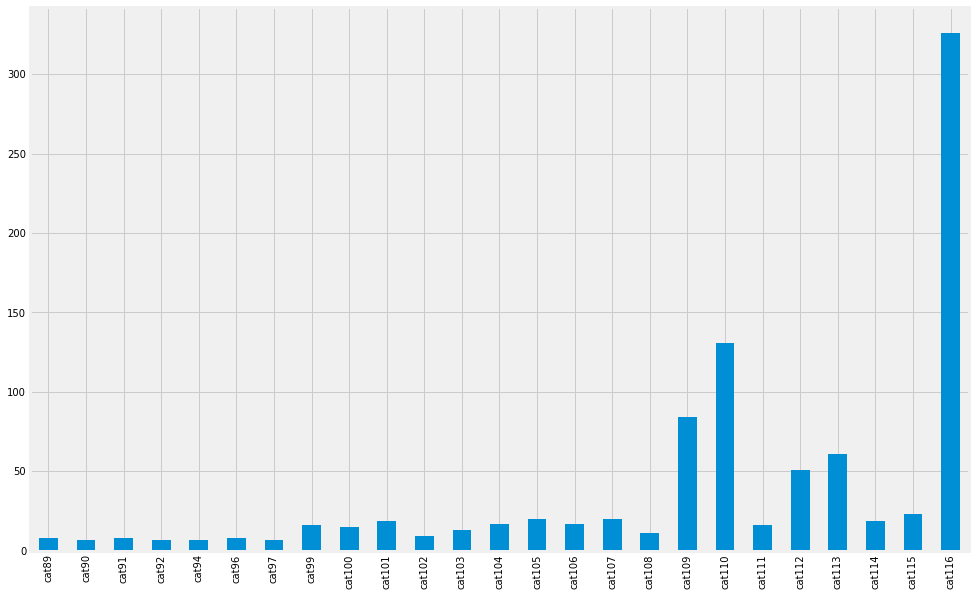

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,10))

train_csv[category_count[category_count.to_numpy() > 5].index].nunique().plot.bar(ax=ax)

## Observation 2
There are many categorical features with number of categories greater than 2 even reaching 350. If we will do one hot encoding it will create a sparse dataframe , dimentionality will increase and our model like random forest will slow down . So we will try with label encoding and convert categorical features into numerical features.

## Skewness

In [ ]:
train_csv.iloc[:,117:].skew()

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

## Observation 3
- It seems cont9 is skewed
- Target Co

```
# This is formatted as code
```

lumn loss is highly skewed 

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
contdf=train_csv.iloc[:,117:].copy(deep=True)


## Using dabl library for exploration

In [ ]:
!pip install dabl

Target looks like regression
Showing only top 10 of 62 categorical features


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74493ed710>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f744079ce90>,
       dtype=object)]

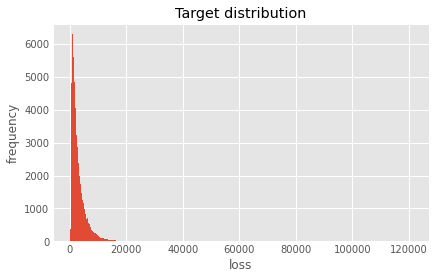

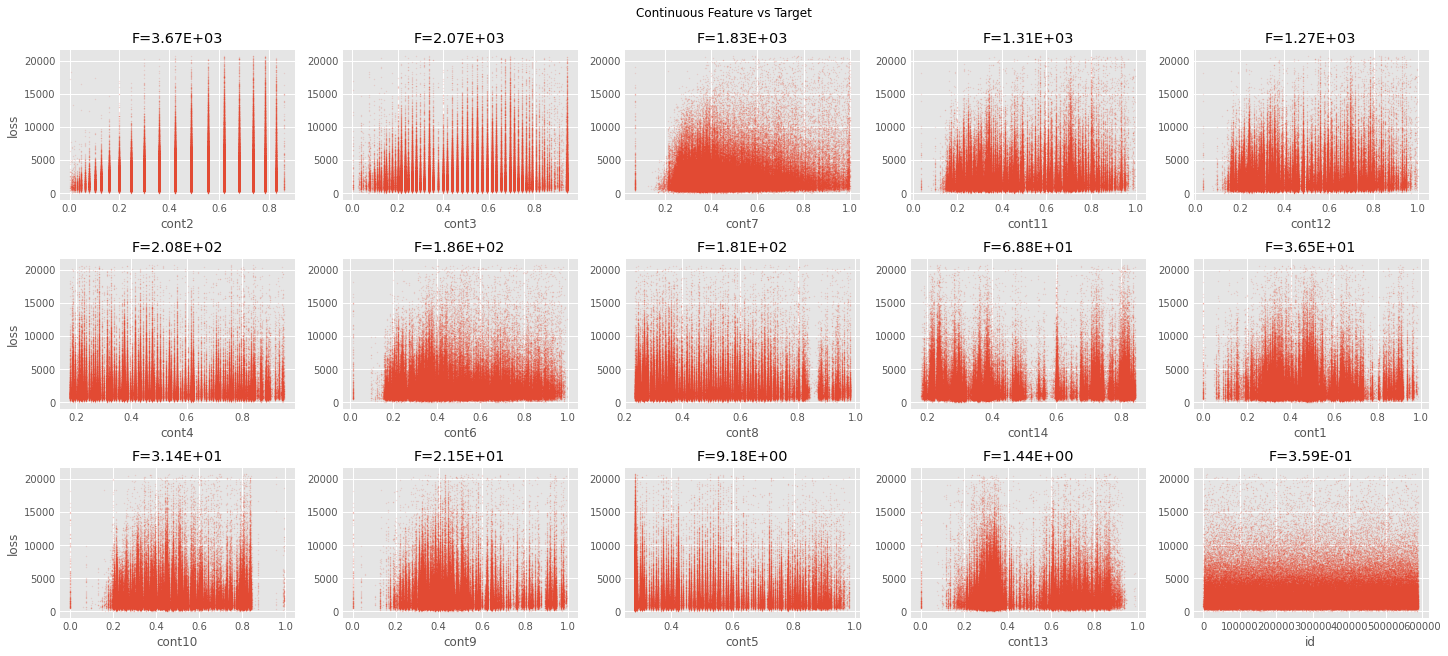

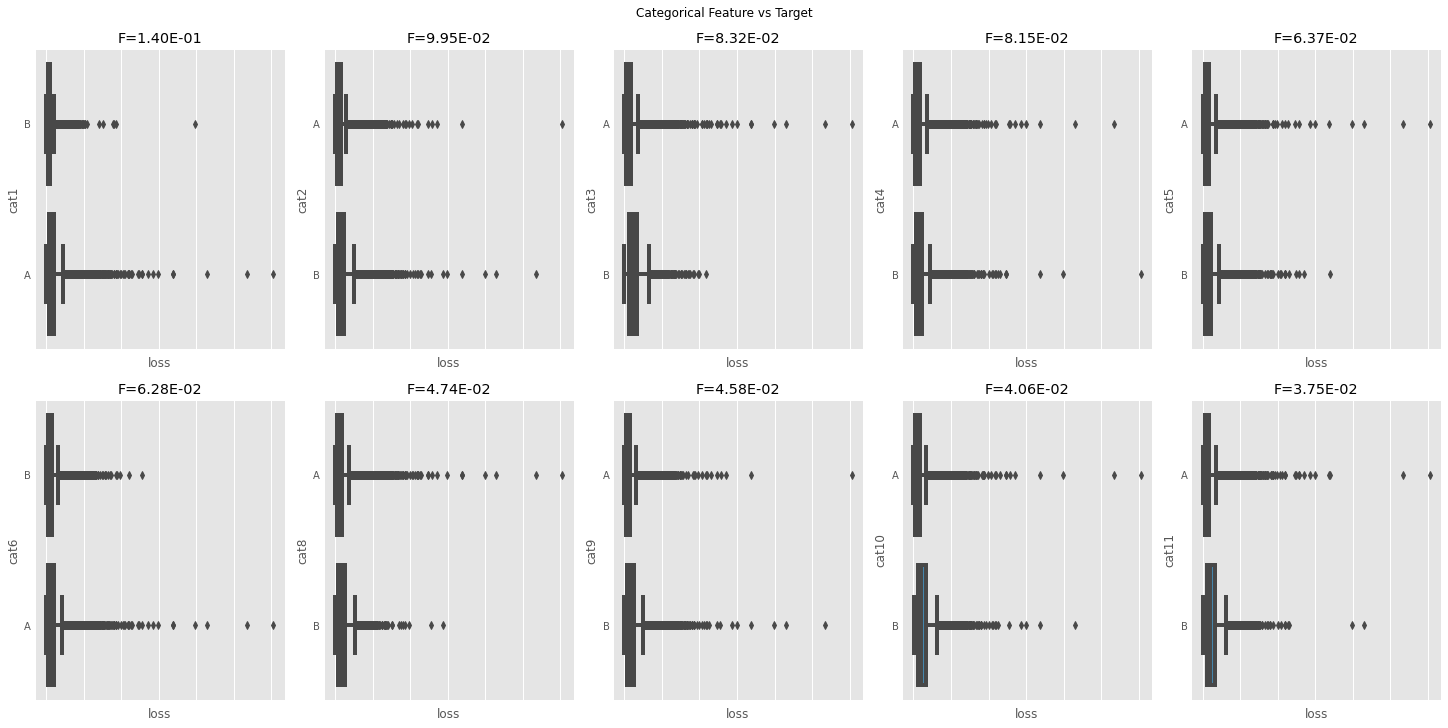

In [ ]:
import dabl
import warnings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
dabl.plot(train_csv, target_col = 'loss')

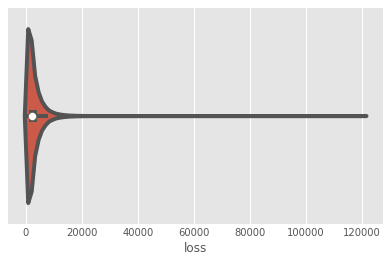

In [ ]:
sns.violinplot(train_csv["loss"])

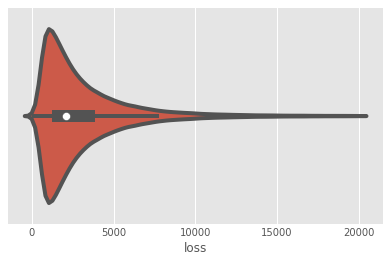

In [ ]:
sns.violinplot(train_csv[train_csv["loss"] < 20000].loss)

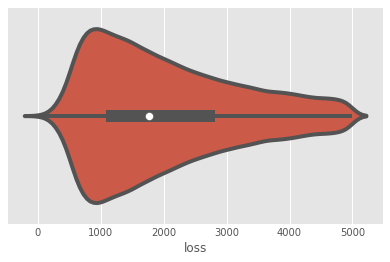

In [ ]:
sns.violinplot(train_csv[train_csv["loss"] < 5000].loss)

In [ ]:
from scipy import stats

((array([-4.48296094, -4.28998303, -4.18522012, ...,  4.18522012,
          4.28998303,  4.48296094]),
  array([6.7000000e-01, 5.2500000e+00, 6.0000000e+00, ..., 8.5923560e+04,
         1.0686300e+05, 1.2101225e+05])),
 (2473.0768852905185, 3037.3376856699833, 0.8515666458189236))

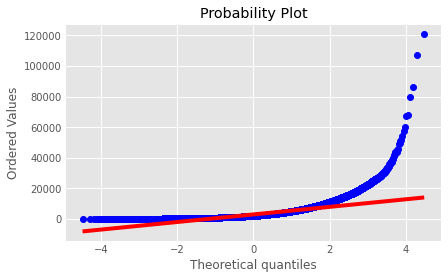

In [ ]:
stats.probplot(train_csv["loss"], plot=plt)

((array([-4.48296094, -4.28998303, -4.18522012, ...,  4.18522012,
          4.28998303,  4.48296094]),
  array([-0.40047757,  1.65822808,  1.79175947, ..., 11.36121334,
         11.57930292, 11.70364706])),
 (0.81042769471734, 7.685267842849341, 0.9982040435003962))

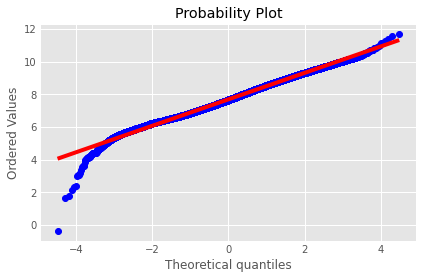

In [ ]:

stats.probplot(np.log(train_csv["loss"]), plot=plt)

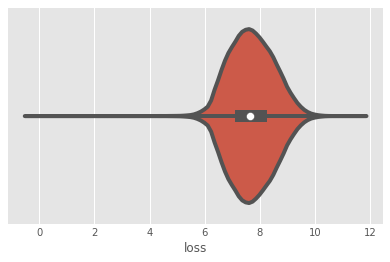

In [ ]:
sns.violinplot(np.log(train_csv["loss"]))

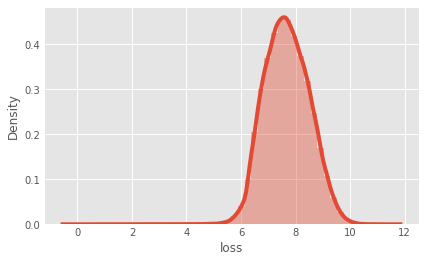

In [ ]:
sns.distplot(np.log(train_csv["loss"]),kde=True)

## Observations 4
- As Cont2 feature increases loss increases .
- There are many out high values losses , mostly above $20000
- Majority loss are between \$100 - \$3000 range
- after log transform distribution of loss became somewhat normal .

# Correlation Analysis :

## Correlation Analysis For Continuous Variables
- "cont1" to "cont14": Continuous variables (masked)
columns start from index 117 - 132

In [ ]:
# sns.pairplot(contdf)


In [ ]:
corr_mat = contdf.corr()

In [ ]:
corr_ml=corr_mat.abs().unstack()
sort = corr_ml.sort_values(kind = "quicksort", ascending = False)
x_sort=sort[(sort > 0.8) & (sort < 1)]

x_sort=list(set([(tuple(sorted(index_tupel)), x_sort[index_tupel]) for index_tupel in x_sort.index]))

unique_high_corrs=pd.DataFrame(x_sort, columns=['cont_feature_pair', 'correlation_coefficient'])
unique_high_corrs

cont_feature_pair  correlation_coefficient
0   (cont10, cont6)                 0.883351
1   (cont1, cont10)                 0.808551
2   (cont13, cont6)                 0.815091
3  (cont11, cont12)                 0.994384
4    (cont1, cont9)                 0.929912

## Observation 5
So, the highest correlation is among cont11 and cont12. There is no perfect correlation of 1 between any pair. We will check correlations plotting a cluster heatmap as well. The motto is to identify the cluster of continuous features having similar trend of correlation among each other.

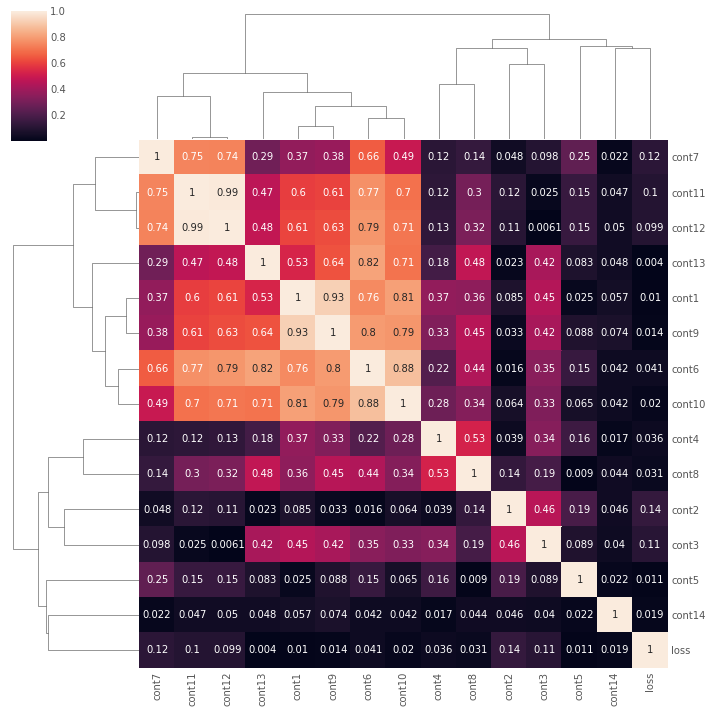

In [ ]:
corr_mat = contdf.corr()
corr_ml=corr_mat.abs()
map = sns.clustermap(corr_ml, annot = True, annot_kws = {'size': 10})
plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
plt.show()

## Observation 6
Visibly, two major clusters are there :

1. One with very high correlations among other {cont7, cont11, cont12, cont13, cont1, cont9, cont6, cont10}.
2. The other is with weak correlations among each other {cont4, cont8, cont2, cont3, cont5, cont14}.
3.  The target variable "loss" is not very highly correlated with any continuous variable.

Lets draw pair plot of cont7, cont11, cont12, cont13, cont1, cont9, cont6, cont10 and loss to seee any linear relation ship .

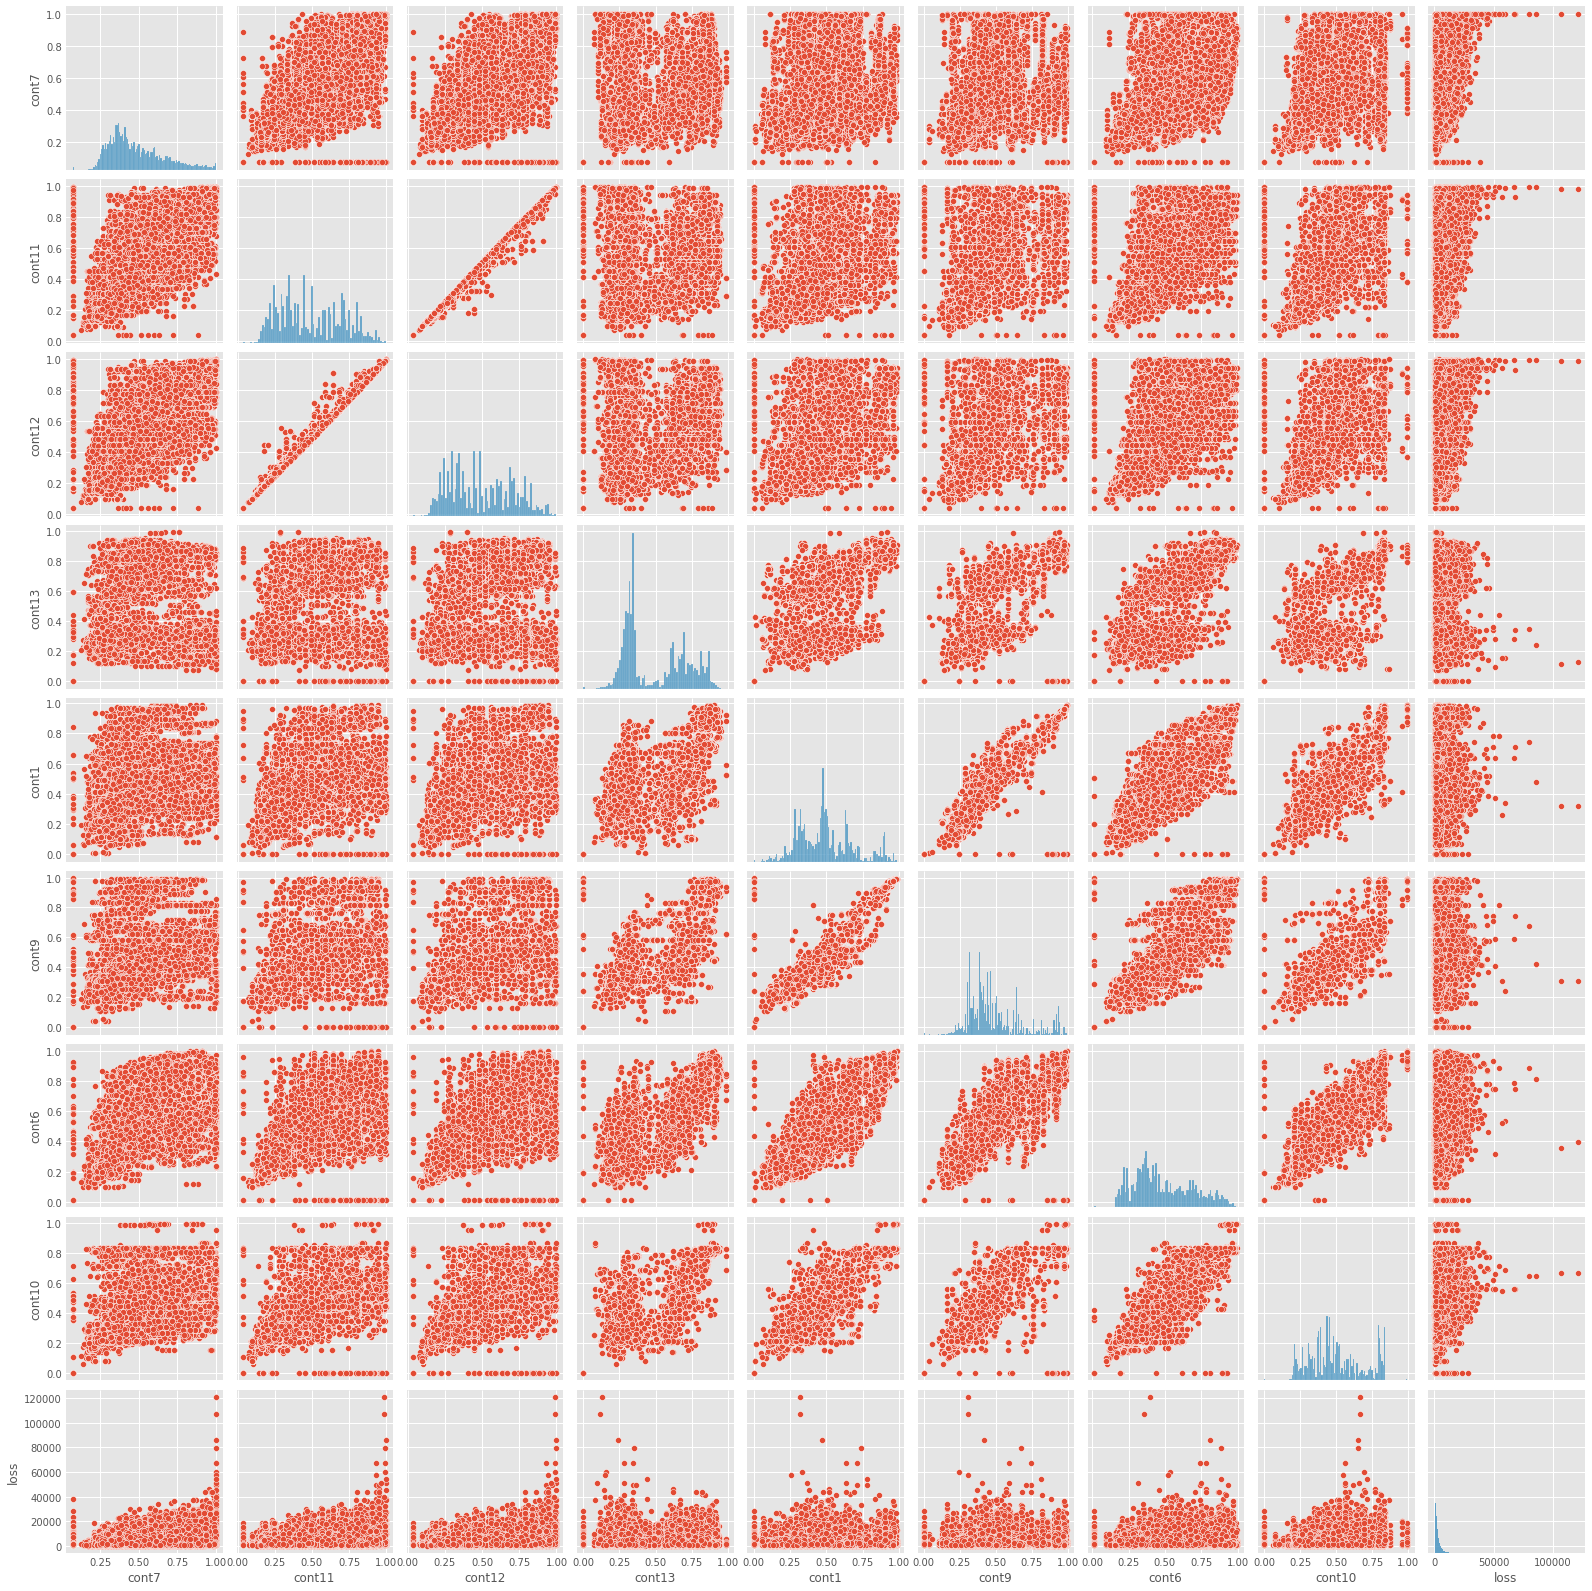

In [ ]:
col = ["cont7", "cont11", "cont12", "cont13", "cont1", "cont9", "cont6", "cont10","loss"]
sns.pairplot(train_csv[col])

## Observation 7
- Steep linear relationship is observed between: (cont11, cont 12)

- Linear relationship is observed between: (cont1, cont9)

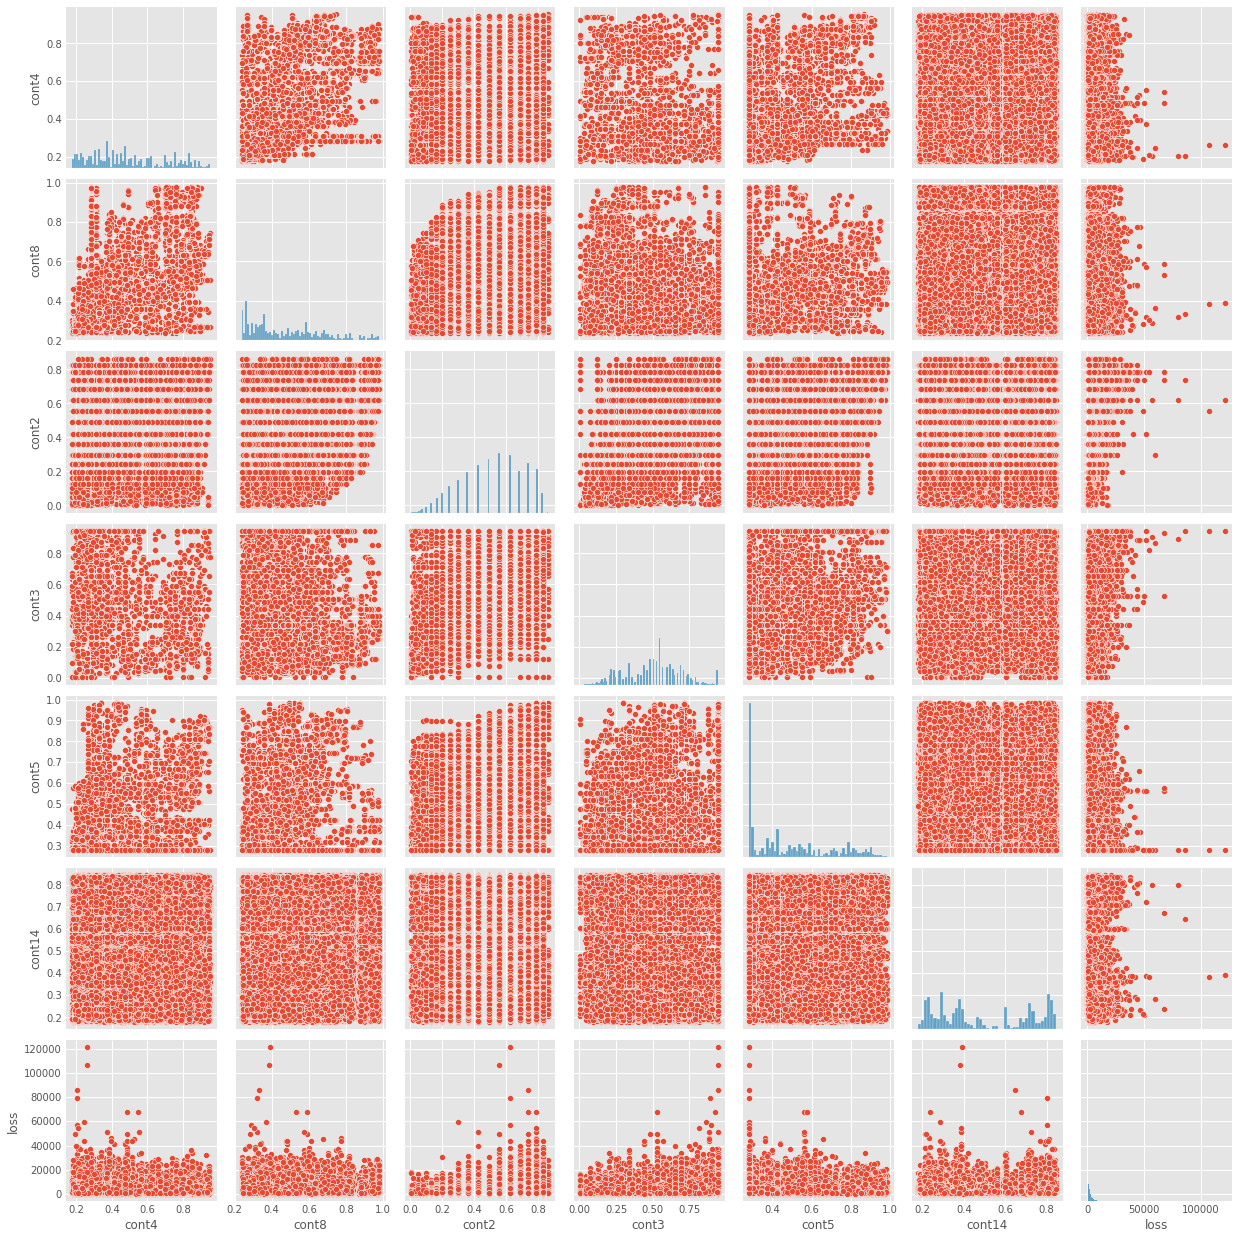

In [ ]:
# Pair plot for judging the inter-relations among the continuous variables in 2nd cluster
sns.pairplot(train_csv, vars=["cont4", "cont8", "cont2", "cont3", "cont5", "cont14", "loss"])

## Observation 8
No significant trend is observed in above pair plotof cluster 2.

## Change Encoding Of categorical variables

As observed in observation 2 that many categorical features have multiple labels we will not prefer one hot encoding , we will go with label encoding.

In [ ]:
# Convert categorical features to continuous features with Label Encoding in train data
from sklearn.preprocessing import LabelEncoder



lencoders = {}
for col in train_csv.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train_csv[col] = lencoders[col].fit_transform(train_csv[col])


#short trick
#https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# train_csv.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)


In [ ]:
# Convert categorical features to continuous features with Label Encoding in test data
from sklearn.preprocessing import LabelEncoder
lencoders_2 = {}
for col in test_csv.select_dtypes(include=['object']).columns:
    lencoders_2[col] = LabelEncoder()
    test_csv[col] = lencoders_2[col].fit_transform(test_csv[col])

In [ ]:
corr_mat_2 = train_csv.iloc[:,1:116].corr()
corr_ml=corr_mat_2.abs().unstack()
sort = corr_ml.sort_values(kind = "quicksort", ascending = False)
x_sort=sort[(sort > 0.8) & (sort < 1)]
x_sort=list(set([(tuple(sorted(i)),x_sort[i] ) for i in x_sort.index]))
unique_high_corrs_2=pd.DataFrame(x_sort, columns=['cont_feature_pair', 'correlation_coefficient'])
unique_high_corrs_2=unique_high_corrs_2.sort_values(kind = "quicksort", ascending = False,by='correlation_coefficient')
unique_high_corrs_2

cont_feature_pair  correlation_coefficient
9      (cat3, cat90)                 0.955738
4      (cat7, cat89)                 0.955504
10      (cat2, cat9)                 0.932420
11     (cat50, cat6)                 0.925731
3     (cat102, cat8)                 0.900799
5     (cat86, cat98)                 0.886774
7      (cat66, cat8)                 0.862231
0    (cat115, cat86)                 0.850152
6     (cat111, cat4)                 0.829929
1   (cat107, cat115)                 0.829241
2     (cat114, cat6)                 0.827932
8      (cat57, cat7)                 0.809418

In [ ]:


features_Cat_high_corr=list(sum(unique_high_corrs_2["cont_feature_pair"].tolist(), ()))

In [ ]:
# sns.pairplot(train_csv, vars=features_Cat_high_corr)
# train_csv[features_Cat_high_corr]

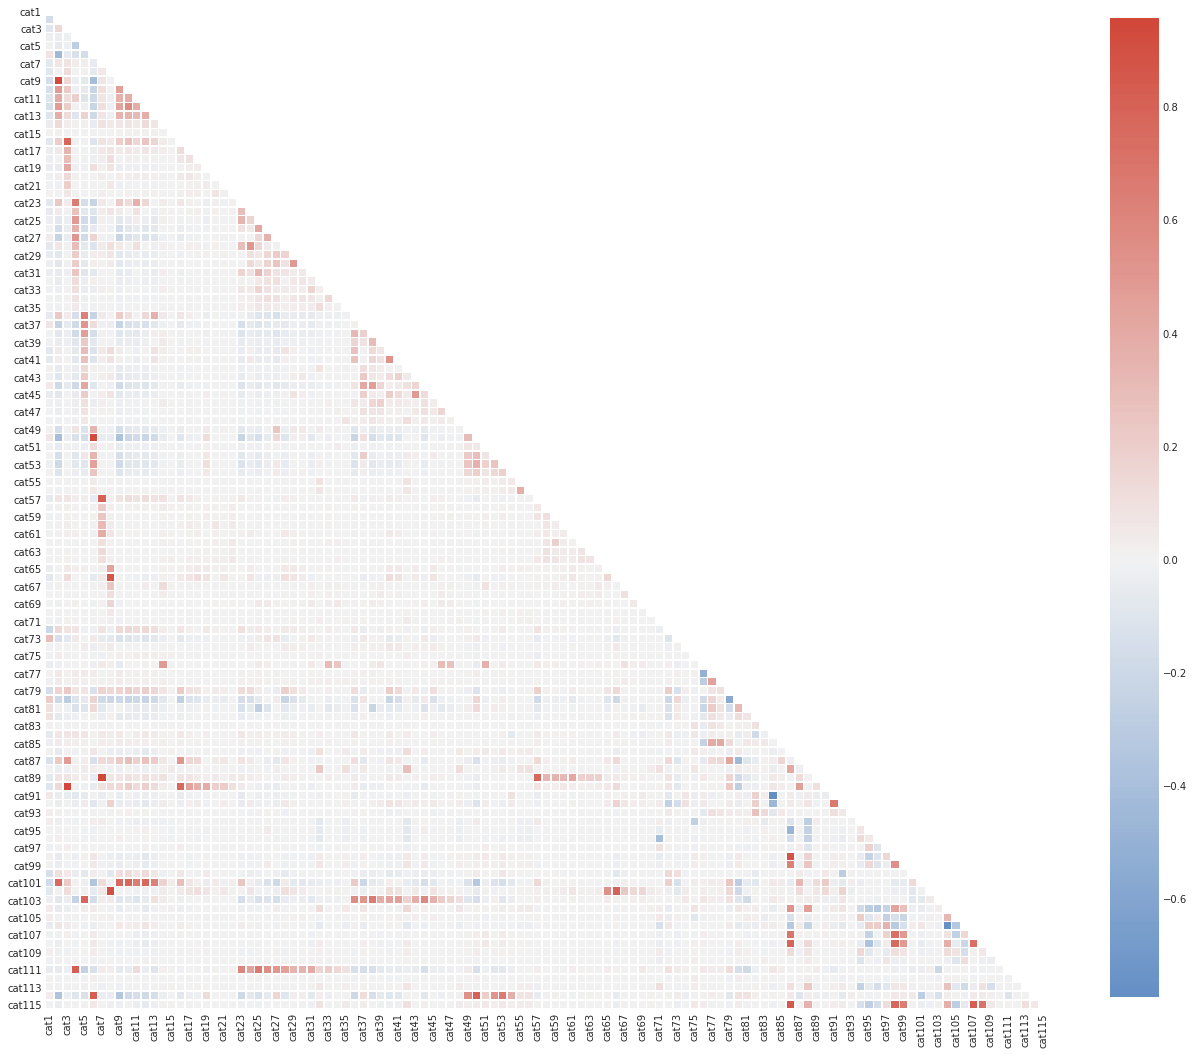

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
mask = np.triu(np.ones_like(corr_mat_2, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(corr_mat_2, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

## Feature Importance and Feature Engineering

Among 130 features, we will check which ones are having dominant contribution towards "loss". We have chosen top 30 features here.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = train_csv.shape[1], # number of component trees
                            max_depth = 8,
                            min_samples_leaf = train_csv.shape[1],
                            max_features = 0.2, # each tree's 20% utility in the features
                            n_jobs = -1)



In [ ]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
  
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist()
    
list_columns = get_col(df=train_csv, type_descr=[np.object, np.number])
len(list_columns)

132

In [ ]:
list_columns.remove('loss')

In [ ]:
rf.fit(train_csv[list_columns], train_csv['loss'])
features = train_csv[list_columns].columns.values

In [ ]:
feature_importance_df=pd.DataFrame(rf.feature_importances_,columns=['feature_importance'])

In [ ]:
feature_importance_df.insert(0,"feature",np.array(list_columns))

In [ ]:
feature_importance_df=feature_importance_df.sort_values(by=['feature_importance'],ascending=False)

In [ ]:
feature_importance_df.head(30)

feature  feature_importance
80    cat80            0.216693
79    cat79            0.185642
87    cat87            0.090445
101  cat101            0.061963
57    cat57            0.050617
12    cat12            0.046709
81    cat81            0.038766
118   cont2            0.037673
89    cat89            0.033186
123   cont7            0.029825
7      cat7            0.026789
10    cat10            0.021354
128  cont12            0.019198
127  cont11            0.015687
72    cat72            0.013977
1      cat1            0.012681
119   cont3            0.008885
94    cat94            0.008351
103  cat103            0.008089
11    cat11            0.005109
2      cat2            0.005027
106  cat106            0.004497
114  cat114            0.004473
111  cat111            0.004341
53    cat53            0.004046
9      cat9            0.003180
122   cont6            0.003026
100  cat100            0.002922
44    cat44            0.002484
38    cat38            0.001971

[Text(0, 0.5, 'Importance'),
 Text(0.5, 0, 'Variable Names'),
 Text(0.5, 1.0, 'Feature Importances')]

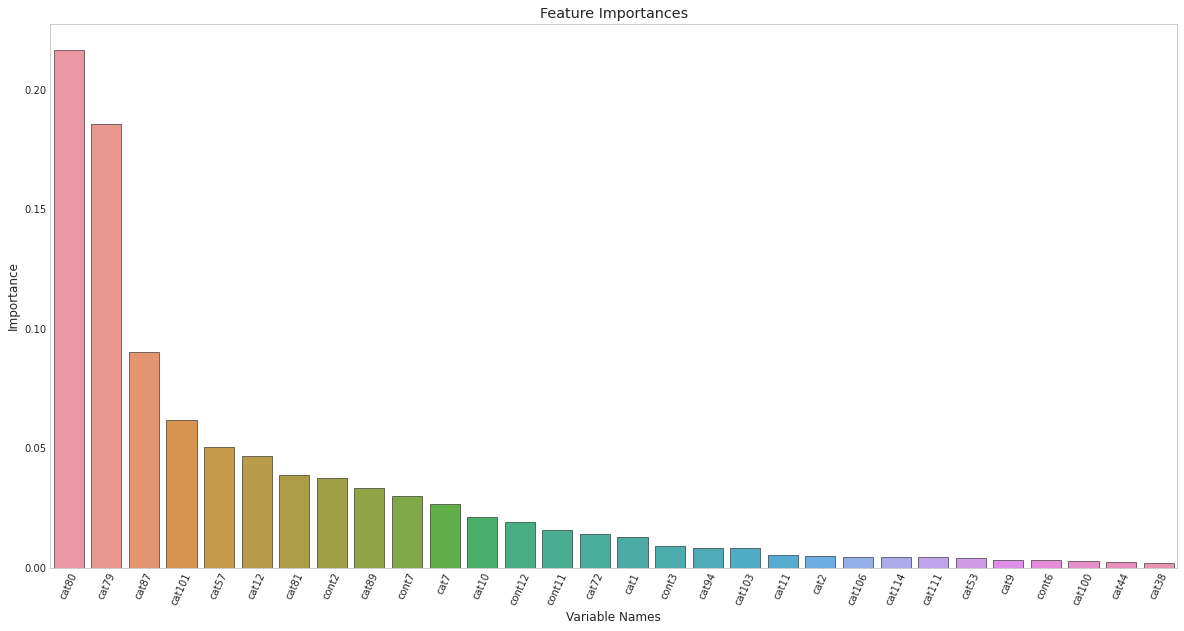

In [ ]:
fig,ax = plt.subplots()
plt.xticks(rotation=65)

fig.set_size_inches(18,10)
#sns.set_color_codes('pastel')
sns.barplot(data=feature_importance_df[:30], 
            x="feature", 
            y="feature_importance", 
            edgecolor='k',
            ax=ax)
ax.set(xlabel="Variable Names",
       ylabel='Importance',
       title="Feature Importances")

## Observation 9
So we see that mainly categorical variables have high feature importance. Only a few continous variables like cont2, cont7, cont12, cont11 have high feature importance.



# Feature Transformation

As seen previously loss is highly skewed . We had alos applied plain log and check probabalit/qq plot. We will try more complex log tranformation and check qq plot .

((array([-4.48296094, -4.28998303, -4.18522012, ...,  4.18522012,
          4.28998303,  4.48296094]),
  array([-0.40047757,  1.65822808,  1.79175947, ..., 11.36121334,
         11.57930292, 11.70364706])),
 (0.81042769471734, 7.685267842849341, 0.9982040435003962))

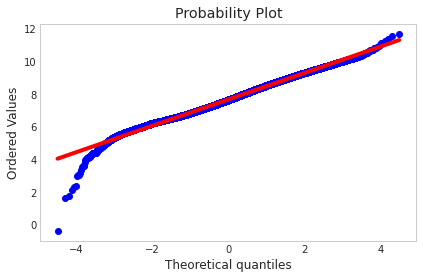

In [ ]:
stats.probplot(np.log(train_csv["loss"]), plot=plt)

((array([-4.48296094, -4.28998303, -4.18522012, ...,  4.18522012,
          4.28998303,  4.48296094]),
  array([ 4.61184784,  4.65633847,  4.66343909, ..., 11.36237649,
         11.58023826, 11.70447308])),
 (0.765570547073684, 7.7452372816551245, 0.9970755483498022))

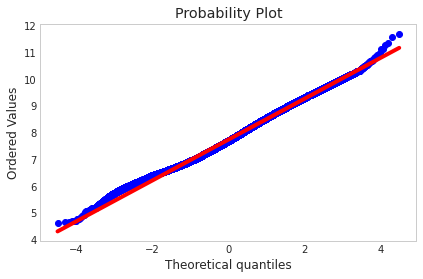

In [ ]:
stats.probplot(np.log(train_csv["loss"]+100), plot=plt)

In [ ]:
from sklearn.preprocessing import power_transform
box_cox_loss=power_transform(train_csv["loss"].to_numpy().reshape(-1,1), method='box-cox')

((array([-4.48296094, -4.28998303, -4.18522012, ...,  4.18522012,
          4.28998303,  4.48296094]),
  array([ 88.26767721,  91.62481227,  91.8332509 , ..., 104.23275858,
         104.4641532 , 104.59519106])),
 (0.9983728714494285, 99.99999999999996, 0.9983484403462486))

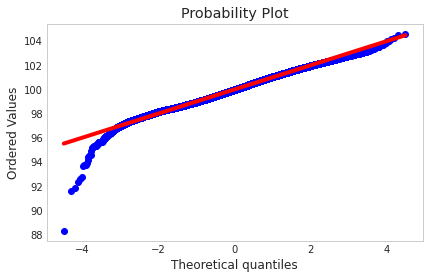

In [ ]:
stats.probplot(box_cox_loss.reshape(-1)+100, plot=plt)

log tranformation follwed by adding a displacement value 100 gave good result. So we will work with 'log_loss' as transformed target variable for training purpose. Next, we proceed for splitting data set into training and testing.



# Train-Test Split :

In [ ]:
X = train_csv[feature_importance_df["feature"]]
Y = np.log(train_csv["loss"]+100)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer, SCORERS


In [ ]:

model1 = LinearRegression(n_jobs=-1)
mae_val= make_scorer(mean_absolute_error, greater_is_better=False)
results1 = cross_val_score(model1, X_train, y_train, cv=5, scoring=mae_val, n_jobs=-1)
print("Linear Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(-1*results1.mean(), results1.std()))

Linear Regression (Manual Tuning): (1.511) +/- (2.160)


In [ ]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
model_ = model.fit()
print(model_.summary())

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1408.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:19:38   Log-Likelihood:            -1.5312e+05
No. Observations:              188318   AIC:                         3.065e+05
Df Residuals:                  188186   BIC:                         3.078e+05
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4835      0.075     86.800      0.0

So, Ordinary Least Square Regression is giving Error value around 49.5% which is actually a weak value for the model. Also, high AIC and BIC values do not indicate a good fit.

## Ridge Regression (L2 Penalty) :

Ridge is a way to regularize regression to curb overfitting. To decrease model complexity, number of features get reduced by penalizing some of the redundant features' sum of squared coefficients (β-coefficients) almost nearing to zero (never exactly zero). Ideally, when we use λ (regularization penalty) tends to infinity, β tends to "0". Here, we are using scikit-learn library's Ridge regression with regularization parameter (α) = 1.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, make_scorer, SCORERS

model2 = Ridge(alpha=1,random_state=seed)
mae_val= make_scorer(mean_absolute_error, greater_is_better=False)
results2 = cross_val_score(model2, X_train, y_train, cv=5, scoring= mae_val, n_jobs=1)
print("Linear Regression Ridge (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results2.mean(), results2.std()))


Linear Regression Ridge (Manual Tuning): (-0.430) +/- (0.001)


## Lasso Regression (L1 Penalty)
Ridge is a way to regularize regression to curb overfitting. To decrease model complexity, number of features get reduced by penalizing some of the redundant features' sum of squared coefficients (β-coefficients) almost nearing to zero (never exactly zero). Ideally, when we use λ (regularization penalty) tends to infinity, β tends to "0". Here, we are using scikit-learn library's Ridge regression with regularization parameter (α) = 1.

In [ ]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=0.0001,random_state=seed)
mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
results3 = cross_val_score(model3, X_train, y_train, cv=5, scoring=mae_val, n_jobs=1)
print("Linear Regression Lasso (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results3.mean(), results3.std()))

Linear Regression Lasso (Manual Tuning): (-0.430) +/- (0.001)


## Elastic Net Regression
Elastic Net is a mix of Ridge and Lasso. If we put l1_ratio = 0, the penalty is 100% L2 penalty (Ridge Regression). Else if we take l1_ratio = 1, it is 100% L1 penalty (Lasso Regression). For any value l1_ratio = x where 0 < x < 1, the penalty is a combination of L1 (x%) and L2 (100-x)%.

In [ ]:
from sklearn.linear_model import ElasticNet
model4 = ElasticNet(alpha=0.0001,l1_ratio=0.5,random_state=seed)
mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
results4 = cross_val_score(model4, X_train, y_train, cv=5, scoring=mae_val, n_jobs=1)
print("Linear Regression Elastic Net (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results4.mean(), results4.std()))

Linear Regression Elastic Net (Manual Tuning): (-0.430) +/- (0.001)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [ ]:
warnings.filterwarnings("ignore")
def select_model(X_train,y_train,folds,models_list,refit_strategy="neg_root_mean_squared_error"):

    
    train_x, train_y = X_train,y_train
    
    if len(models_list) ==0:
      print("atleast 1 model is required")
      return 0

    models = models_list
    result = {}

  
    scoring_strategy = ['neg_root_mean_squared_error', 'neg_mean_squared_error','neg_mean_absolute_error']
    for model in models:
      print(model["name"])
      grid = RandomizedSearchCV(model["estimator"],param_distributions=model["hyperparameters"],cv=folds,scoring=scoring_strategy,refit=refit_strategy)
      grid.fit(train_x,train_y)

      model["best_params"] = grid.best_params_
      model["best_score"] = grid.best_score_
      model["best_model"] = grid.best_estimator_
      print("Best parameters: ", model["best_params"])
      print("Best score: ", model["best_score"])
      print("Best estimator: ", model["best_model"])


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
# Helper function for making prediction and evaluating scores
def train_and_predict(n_splits, base_model, X, y, name):
    features = X.columns
    X = np.array(X)
    y = np.array(y)
    
    folds = list(KFold(n_splits = n_splits, shuffle = True, random_state = 4).split(X, y))
    
   
    
    root_mean_squared_error_y = []

    mean_squared_error_y = []
    mean_absolute_error_y = []
    
    
    for i, clf in enumerate(base_model):
        for j, (train, test) in enumerate(folds):
            
            # Creating train and test sets
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]

            clf.fit(X_train, y_train)
            y_true, y_pred = y_test, clf.predict(X_test)
            train_ = clf.score(X_train, y_train)
            test_ = clf.score(X_test, y_test)
            root_mean_squared_error_=mean_squared_error(y_true, y_pred,squared=False).round(3)
            mean_squared_error_=mean_squared_error(y_true, y_pred).round(3)
            mean_absolute_error_=mean_absolute_error(y_true, y_pred).round(3)

            print(f'Model- {name.capitalize()} and CV- {j}')
            print('-'*20)
            print('Training Score: {0:.3f}'.format(train_))
            print('Test Score: {0:.3f}'.format(test_))

            print('root_mean_squared_error_: {0:.3f}'.format(root_mean_squared_error_))
            print('mean_squared_error_: {0:.3f}'.format(mean_squared_error_))
            print('mean_absolute_error_: {0:.3f}'.format(mean_absolute_error_))

            #appending
            root_mean_squared_error_y.append(root_mean_squared_error_)
            mean_squared_error_y.append(mean_squared_error_)
            mean_absolute_error_y.append(mean_absolute_error_)

            # Creating a dataframe of scores
            df = pd.DataFrame([np.mean(root_mean_squared_error_y).round(3),np.mean(mean_squared_error_y).round(3),np.mean(mean_absolute_error_y).round(3)], columns = [name]).T
            df.columns = ['RMSE','MSE','MAE']
    
    return df








In [ ]:
#initilize model which contains all algorithms with hyperparameters to tune
models = []

In [ ]:
rfr = {
        "name": "RandomForestRegressor",
        "estimator": RandomForestRegressor(),
        "hyperparameters":
        {
            "n_estimators": [4, 6, 9],
            "criterion": ["mse", "mae"],
            "max_depth": [10,15,20],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [ 5, 8],
            "min_samples_split": [ 3, 5]
        }
    }
models.append(rfr)

In [ ]:

rl2 = {
    "name":"Ridge Regression l2 regularization",
    "estimator":Ridge(),
    "hyperparameters":
    {
        "alpha":np.logspace(-4, 9, 100)
    }
    
}
models.append(rl2)

In [ ]:
ll1={
    "name":"Lasso Regression l1 regularization",
     "estimator":Lasso(),
     "hyperparameters":
     {
         "alpha":np.logspace(-4, 9, 100)
     }
    
}
models.append(rl2)

In [ ]:
el1l2={
    "name":"Elastic Name",
    "estimator":ElasticNet(),
    "hyperparameters":
     {
    "alpha":np.logspace(-4, 9, 50)
     }
}

In [ ]:
model=select_model(X_train,y_train,10,[ll1])

Lasso Regression l1 regularization
Best parameters:  {'alpha': 0.0001830738280295368}
Best score:  -0.5466030361663666
Best estimator:  Lasso(alpha=0.0001830738280295368)


In [ ]:
base_model=Lasso(alpha=0.0001830738280295368)
n_splits = 5
df=train_and_predict(n_splits,[base_model],X,Y,"Lasso with Hyperparameter")

Model- Lasso with hyperparameter and CV- 0
--------------------
Training Score: 0.495
Test Score: 0.490
root_mean_squared_error_: 0.545
mean_squared_error_: 0.297
mean_absolute_error_: 0.429
Model- Lasso with hyperparameter and CV- 1
--------------------
Training Score: 0.494
Test Score: 0.494
root_mean_squared_error_: 0.548
mean_squared_error_: 0.300
mean_absolute_error_: 0.431
Model- Lasso with hyperparameter and CV- 2
--------------------
Training Score: 0.495
Test Score: 0.491
root_mean_squared_error_: 0.546
mean_squared_error_: 0.298
mean_absolute_error_: 0.431
Model- Lasso with hyperparameter and CV- 3
--------------------
Training Score: 0.494
Test Score: 0.494
root_mean_squared_error_: 0.548
mean_squared_error_: 0.300
mean_absolute_error_: 0.432
Model- Lasso with hyperparameter and CV- 4
--------------------
Training Score: 0.493
Test Score: 0.498
root_mean_squared_error_: 0.545
mean_squared_error_: 0.297
mean_absolute_error_: 0.431


In [ ]:
df

RMSE    MSE    MAE
Lasso with Hyperparameter  0.546  0.298  0.431

In [ ]:
model=select_model(X_train,y_train,10,[rl2])

Ridge Regression l2 regularization
Best parameters:  {'alpha': 0.14174741629268062}
Best score:  -0.5463128263655278
Best estimator:  Ridge(alpha=0.14174741629268062)


In [ ]:
base_model=Ridge(alpha=0.14174741629268062)
n_splits = 5
df1=train_and_predict(n_splits,[base_model],X,Y,"Ridge with Hyperparameter")
df=df.append(df1)

Model- Ridge with hyperparameter and CV- 0
--------------------
Training Score: 0.496
Test Score: 0.491
root_mean_squared_error_: 0.544
mean_squared_error_: 0.296
mean_absolute_error_: 0.428
Model- Ridge with hyperparameter and CV- 1
--------------------
Training Score: 0.495
Test Score: 0.495
root_mean_squared_error_: 0.548
mean_squared_error_: 0.300
mean_absolute_error_: 0.431
Model- Ridge with hyperparameter and CV- 2
--------------------
Training Score: 0.496
Test Score: 0.492
root_mean_squared_error_: 0.546
mean_squared_error_: 0.298
mean_absolute_error_: 0.430
Model- Ridge with hyperparameter and CV- 3
--------------------
Training Score: 0.495
Test Score: 0.494
root_mean_squared_error_: 0.548
mean_squared_error_: 0.300
mean_absolute_error_: 0.432
Model- Ridge with hyperparameter and CV- 4
--------------------
Training Score: 0.494
Test Score: 0.498
root_mean_squared_error_: 0.545
mean_squared_error_: 0.297
mean_absolute_error_: 0.430


In [ ]:
df

RMSE    MSE    MAE
Lasso with Hyperparameter  0.546  0.298  0.431
Ridge with Hyperparameter  0.546  0.298  0.430

In [ ]:
model=select_model(X_train,y_train,10,[el1l2])

Elastic Name
Best parameters:  {'alpha': 0.0071968567300115215}
Best score:  -0.5564985048907298
Best estimator:  ElasticNet(alpha=0.0071968567300115215)


In [ ]:
base_model=ElasticNet(alpha=0.0071968567300115215)
n_splits = 5
df1=train_and_predict(n_splits,[base_model],X,Y,"Elasticnet Hyperparameter")
df=df.append(df1)

Model- Elasticnet hyperparameter and CV- 0
--------------------
Training Score: 0.476
Test Score: 0.474
root_mean_squared_error_: 0.553
mean_squared_error_: 0.306
mean_absolute_error_: 0.437
Model- Elasticnet hyperparameter and CV- 1
--------------------
Training Score: 0.475
Test Score: 0.474
root_mean_squared_error_: 0.559
mean_squared_error_: 0.312
mean_absolute_error_: 0.441
Model- Elasticnet hyperparameter and CV- 2
--------------------
Training Score: 0.476
Test Score: 0.472
root_mean_squared_error_: 0.556
mean_squared_error_: 0.309
mean_absolute_error_: 0.440
Model- Elasticnet hyperparameter and CV- 3
--------------------
Training Score: 0.475
Test Score: 0.475
root_mean_squared_error_: 0.558
mean_squared_error_: 0.312
mean_absolute_error_: 0.441
Model- Elasticnet hyperparameter and CV- 4
--------------------
Training Score: 0.474
Test Score: 0.479
root_mean_squared_error_: 0.556
mean_squared_error_: 0.309
mean_absolute_error_: 0.440


In [ ]:
df

RMSE    MSE    MAE
Lasso with Hyperparameter  0.546  0.298  0.431
Ridge with Hyperparameter  0.546  0.298  0.430
Elasticnet Hyperparameter  0.556  0.310  0.440

In [ ]:
base_model=ElasticNet()
n_splits = 5
df1=train_and_predict(n_splits,[base_model],X,Y,"Elasticnet without Hyperparameter")
df=df.append(df1)

Model- Elasticnet without hyperparameter and CV- 0
--------------------
Training Score: 0.116
Test Score: 0.116
root_mean_squared_error_: 0.717
mean_squared_error_: 0.515
mean_absolute_error_: 0.583
Model- Elasticnet without hyperparameter and CV- 1
--------------------
Training Score: 0.117
Test Score: 0.113
root_mean_squared_error_: 0.726
mean_squared_error_: 0.527
mean_absolute_error_: 0.588
Model- Elasticnet without hyperparameter and CV- 2
--------------------
Training Score: 0.115
Test Score: 0.118
root_mean_squared_error_: 0.719
mean_squared_error_: 0.517
mean_absolute_error_: 0.583
Model- Elasticnet without hyperparameter and CV- 3
--------------------
Training Score: 0.117
Test Score: 0.113
root_mean_squared_error_: 0.725
mean_squared_error_: 0.526
mean_absolute_error_: 0.589
Model- Elasticnet without hyperparameter and CV- 4
--------------------
Training Score: 0.114
Test Score: 0.118
root_mean_squared_error_: 0.723
mean_squared_error_: 0.522
mean_absolute_error_: 0.587


In [ ]:
df

RMSE    MSE    MAE
Lasso with Hyperparameter          0.546  0.298  0.431
Ridge with Hyperparameter          0.546  0.298  0.430
Elasticnet Hyperparameter          0.556  0.310  0.440
Elasticnet without Hyperparameter  0.722  0.521  0.586

In [ ]:
model=select_model(X_train,y_train,10,[rfr])

RandomForestRegressor
Best parameters:  {'n_estimators': 6, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mse'}
Best score:  -0.5465189263418317
Best estimator:  RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=3, n_estimators=6)


On collab hyperparameter tuning for random came with a huge cost
7h 15m 9scompleted at 16:54 . 


RandomForestRegressor
Best parameters:  {'n_estimators': 6, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mse'}
Best score:  -0.5465189263418317
Best estimator:  RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=3, n_estimators=6)

In [ ]:
base_model=RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=3, n_estimators=6)


n_splits = 5
df1=train_and_predict(n_splits,[base_model],X,Y,"Random Foreset with Hyperparameter")
df=df.append(df1)





Model- Random foreset with hyperparameter and CV- 0
--------------------
Training Score: 0.554
Test Score: 0.494
root_mean_squared_error_: 0.543
mean_squared_error_: 0.295
mean_absolute_error_: 0.428
Model- Random foreset with hyperparameter and CV- 1
--------------------
Training Score: 0.546
Test Score: 0.485
root_mean_squared_error_: 0.553
mean_squared_error_: 0.306
mean_absolute_error_: 0.436
Model- Random foreset with hyperparameter and CV- 2
--------------------
Training Score: 0.556
Test Score: 0.489
root_mean_squared_error_: 0.547
mean_squared_error_: 0.299
mean_absolute_error_: 0.431
Model- Random foreset with hyperparameter and CV- 3
--------------------
Training Score: 0.560
Test Score: 0.496
root_mean_squared_error_: 0.547
mean_squared_error_: 0.299
mean_absolute_error_: 0.430
Model- Random foreset with hyperparameter and CV- 4
--------------------
Training Score: 0.555
Test Score: 0.496
root_mean_squared_error_: 0.546
mean_squared_error_: 0.298
mean_absolute_error_: 0.431


In [ ]:
df

RMSE    MSE    MAE
Lasso with Hyperparameter           0.546  0.298  0.431
Ridge with Hyperparameter           0.546  0.298  0.430
Elasticnet Hyperparameter           0.556  0.310  0.440
Elasticnet without Hyperparameter   0.722  0.521  0.586
Random Foreset with Hyperparameter  0.547  0.299  0.431

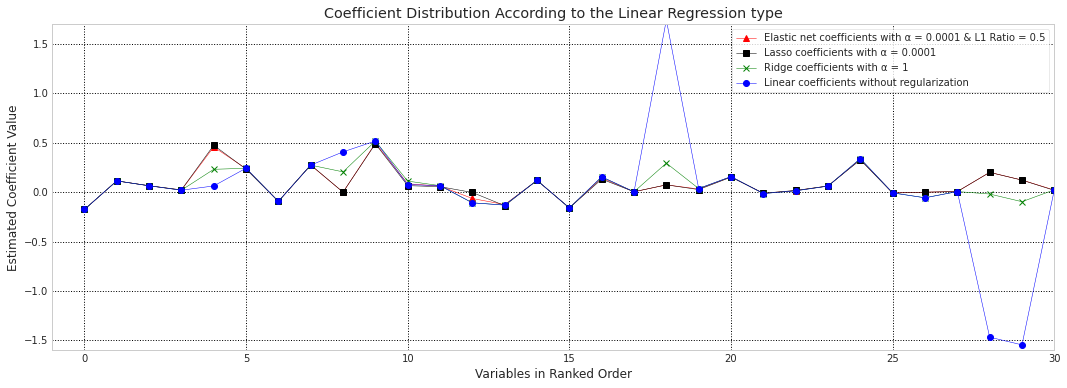

In [ ]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
ridge = Ridge(alpha=1,random_state=seed)
ridge.fit(X_train, y_train)
linear = LinearRegression()
linear.fit(X_train, y_train)
enet = ElasticNet(alpha=0.0001, l1_ratio=0.5)
enet.fit(X_train, y_train)

plt.figure(figsize = (16, 6))
plt.plot(enet.coef_, color='red', linewidth=0.5, marker='^', label='Elastic net coefficients with α = 0.0001 & L1 Ratio = 0.5')
plt.plot(lasso.coef_, color='black', linewidth=0.5, marker='s', label='Lasso coefficients with α = 0.0001')
plt.plot(ridge.coef_, color='green', linewidth=0.5, marker='x', label='Ridge coefficients with α = 1')
plt.plot(linear.coef_, color='blue', linewidth=0.5, marker='o', label='Linear coefficients without regularization')
plt.grid(color='black', linestyle='dotted')
plt.ylim([-1.6,1.7])
plt.xlim([-1,30])
plt.legend(loc='best')
plt.title('Coefficient Distribution According to the Linear Regression type')
plt.xlabel('Variables in Ranked Order')
plt.ylabel('Estimated Coefficient Value')
plt.show()

We can see variation in ranking of variables (for estimated coefficient values) in range 10-15 only. For other range, the graphs are pretty similar coinciding the points. The fluctuation in coefficient value is the highest for blue curve i.e. for linear coefficients without regularization which is obvious.

Let's try plotting residuals for Ridge, Lasso and Elastic Net models we used here.

- We have used various regression models and random forest.
- Random forest did not improved result much.





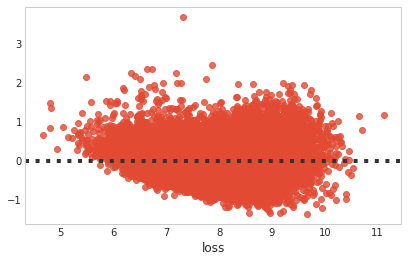

In [ ]:
enet_y_predicted = enet.predict(X_test)
enet_y_train_predicted = enet.predict(X_train)
sns.residplot(y_test,enet_y_predicted,label="testR2")


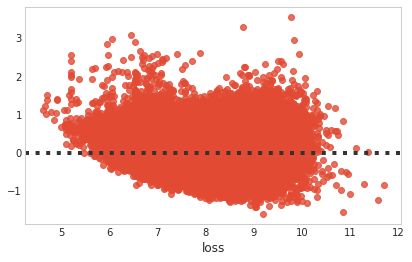

In [ ]:
sns.residplot(y_train,enet_y_train_predicted,label="trainr2")